# **Resume Parsing Using NLP**

## **GROUP - 4 Members**
**Abhishek S B [AM.EN.U4AIE21102]**

**Advaith P R [AM.EN.U4AIE21106]**

**Gokul Krishna B R [AM.EN.U4AIE21131]**

**Parvathy G Pillai [AM.EN.U4AIE21150]**

**S Anand [AM.EN.U4AIE21155]**

### Creating Corpus using sketch Engine

We used SketchEngine to create a corpus, wikipedia pages were given as input


In [1]:
from PIL import Image

### Creating word embedding

In [16]:
from gensim.models import Word2Vec
import string
import re
from nltk.corpus import stopwords
with open(r'/content/skills.txt',encoding="utf8") as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip() for x in content]

In [17]:
content[1]

'Data science is a "concept to unify statistics, data analysis, machine learning and their related methods" in order to "understand and analyze actual phenomena" with data. It employs techniques and theories drawn from many fields within the context of mathematics, statistics, information science, and computer science. Turing award winner Jim Gray imagined data science as a "fourth paradigm" of science (empirical, theoretical, computational and now data-driven) and asserted that "everything about science is changing because of the impact of information technology" and the data deluge.'

In [18]:
from nltk.tokenize import word_tokenize
import gensim
from gensim.models.phrases import Phraser, Phrases

**Preprocessing**

In [19]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Download stopwords dataset
nltk.download('stopwords', quiet=True)


x = []
for line in content:
    tokens = word_tokenize(line)
    tok = [w.lower() for w in tokens]
    table = str.maketrans('', '', string.punctuation)
    strpp = [w.translate(table) for w in tok]
    words = [word for word in strpp if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    x.append(words)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:
texts=x

In [25]:
print(texts[3])

['term', 'data', 'science', 'appeared', 'various', 'contexts', 'past', 'thirty', 'years', 'become', 'established', 'term', 'recently', 'early', 'usage', 'used', 'substitute', 'computer', 'science', 'peter', 'naur', 'naur', 'later', 'introduced', 'term', 'datalogy', 'naur', 'published', 'concise', 'survey', 'computer', 'methods', 'freely', 'used', 'term', 'data', 'science', 'survey', 'contemporary', 'data', 'processing', 'methods', 'used', 'wide', 'range', 'applications']


**Removing commonly occuring words that are not useful**

In [26]:
with open('common.txt') as f:
    content2 = f.read()
ntexts=[]
l=len(texts)
for j in range(l):
    s=texts[j]
    res = [i for i in s if i not in content2]
    ntexts.append(res)
print(texts[3])



['term', 'data', 'science', 'appeared', 'various', 'contexts', 'past', 'thirty', 'years', 'become', 'established', 'term', 'recently', 'early', 'usage', 'used', 'substitute', 'computer', 'science', 'peter', 'naur', 'naur', 'later', 'introduced', 'term', 'datalogy', 'naur', 'published', 'concise', 'survey', 'computer', 'methods', 'freely', 'used', 'term', 'data', 'science', 'survey', 'contemporary', 'data', 'processing', 'methods', 'used', 'wide', 'range', 'applications']


In [27]:
print(ntexts[3])

['term', 'data', 'science', 'appeared', 'various', 'contexts', 'past', 'thirty', 'years', 'become', 'established', 'term', 'recently', 'early', 'usage', 'used', 'substitute', 'computer', 'science', 'peter', 'naur', 'naur', 'later', 'introduced', 'term', 'datalogy', 'naur', 'published', 'concise', 'survey', 'computer', 'methods', 'freely', 'used', 'term', 'data', 'science', 'survey', 'contemporary', 'data', 'processing', 'methods', 'used', 'wide', 'range', 'applications']


In [28]:
print(len(ntexts))
texts=ntexts

316


In [29]:
content=texts

**Creating bigrams**

In [34]:
common_terms = ["of", "with", "without", "and", "or", "the", "a"]
x=ntexts
# Create the relevant phrases from the list of sentences:
phrases = Phrases(ntexts)
# The Phraser object is used from now on to transform sentences
bigram = Phraser(phrases)
# Applying the Phraser to transform our sentences
all_sentences = list(bigram[x])
model=gensim.models.Word2Vec(all_sentences,vector_size=5000,min_count=2,workers=4,window=4)
model.save("final.model")
# Use .key_to_index instead of .vocab
words=list(model.wv.key_to_index)
print(len(words))

1259


**Testing**

In [35]:
z=model.wv.most_similar("machine_learning")

In [36]:
print(z)

[('software', 0.15304957330226898), ('data', 0.1448012888431549), ('using', 0.1437668800354004), ('language', 0.14163680374622345), ('deep_learning', 0.14132162928581238), ('deep', 0.14066118001937866), ('layer', 0.13416840136051178), ('used', 0.13283158838748932), ('data_science', 0.1328025907278061), ('model', 0.13211007416248322)]


### Resume Parsing

In [38]:
!pip install PyPDF2
import PyPDF2
import os
import collections
from os import listdir
from os.path import isfile, join
from io import StringIO
import pandas as pd
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
from spacy.matcher import PhraseMatcher

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.2 MB/s eta 0:00:00


**Reading Resumes from folder**

In [117]:
mypath=r'/content/Resumes'
#Path for the files
onlyfiles = [os.path.join(mypath, f) for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]


**Function to words from resume**

In [102]:
!pip install --upgrade PyPDF2

import PyPDF2

def pdfextract(file):
    # creating a pdf file object
    read_pdf = PyPDF2.PdfReader(file)
    number_of_pages = len(read_pdf.pages)
    c = range(number_of_pages)
    page_content = ""
    for i in c:
        #page
        page = read_pdf.pages[i] # Use the updated method to get the page
        page_content += page.extract_text() # Append text from each page
    return (page_content.encode('utf-8'))

In [103]:
sim_words=[k[0] for k in model.wv.most_similar("machine_learning")]

In [104]:
def create_bigram(words):
    common_terms = ["of", "with", "without", "and", "or", "the", "a"]
    x=words.split()
# Create the relevant phrases from the list of sentences:
    phrases = Phrases(x, common_terms=common_terms)
# The Phraser object is used from now on to transform sentences
    bigram = Phraser(phrases)
# Applying the Phraser to transform our sentences is simply
    all_sentences = list(bigram[x])



**Function to build candidate profile**

In [105]:
import os
import pandas as pd
from io import StringIO
from collections import Counter
from gensim.models import Word2Vec
from spacy.matcher import PhraseMatcher
import spacy

def create_profile(file):
    model = Word2Vec.load("final.model")
    text = str(pdfextract(file))
    text = text.replace("\\n", "")
    text = text.lower()

    stats = [nlp(text[0]) for text in model.wv.most_similar("statistics")]
    NLP = [nlp(text[0]) for text in model.wv.most_similar("language")]
    ML = [nlp(text[0]) for text in model.wv.most_similar("machine_learning")]
    DL = [nlp(text[0]) for text in model.wv.most_similar("deep")]
    python = [nlp(text[0]) for text in model.wv.most_similar("python")]
    Data_Engineering = [nlp(text[0]) for text in model.wv.most_similar("data")]

    matcher = PhraseMatcher(nlp.vocab)
    matcher.add('Stats', None, *stats)
    matcher.add('NLP', None, *NLP)
    matcher.add('ML', None, *ML)
    matcher.add('DL', None, *DL)
    matcher.add('Python', None, *python)
    matcher.add('DE', None, *Data_Engineering)
    doc = nlp(text)

    d = []
    matches = matcher(doc)
    for match_id, start, end in matches:
        rule_id = nlp.vocab.strings[match_id]
        span = doc[start:end]
        d.append((rule_id, span.text))

    keywords = "\n".join(f'{i[0]} {i[1]} ({j})' for i, j in Counter(d).items())
    print("KEYWORDS")
    print(keywords)
    df = pd.read_csv(StringIO(keywords), names=['Keywords_List'])

    df['Subject'] = df['Keywords_List'].apply(lambda x: x.split(' ', 1)[0])
    df['Keyword_Count'] = df['Keywords_List'].apply(lambda x: x.split(' ', 1)[1])

    df['Keyword'] = df['Keyword_Count'].apply(lambda x: x.split('(')[0].strip())
    df['Count'] = df['Keyword_Count'].apply(lambda x: x.split('(')[1].rstrip(')'))

    df.drop(columns=['Keyword_Count', 'Keywords_List'], inplace=True)

    base = os.path.basename(file)
    filename = os.path.splitext(base)[0]
    name = filename.split('_')[0].lower()

    name_df = pd.DataFrame([name], columns=['Candidate Name'])
    dataf = pd.concat([name_df, df], axis=1)
    dataf['Candidate Name'].fillna(dataf['Candidate Name'].iloc[0], inplace=True)

    return dataf

**Code to execute the above functions**

In [119]:
#Code to execute the above functions
final_db=pd.DataFrame()
i=0
for file in onlyfiles:
    dat = create_profile(file)
    final_db = pd.concat([final_db, dat], ignore_index=True)

print(final_db)
    #print(final_db)

KEYWORDS
NLP system (2)
Python system (2)
ML using (3)
NLP using (3)
Stats using (3)
DE using (3)
DL using (3)
Python using (3)
KEYWORDS
NLP programming (1)
DE programming (1)
DL programming (1)
ML language (1)
DE language (1)
DL language (1)
Python language (1)
Stats used (1)
ML used (1)
NLP used (1)
ML data (2)
NLP data (2)
Stats data (2)
DL data (2)
Python data (2)
ML using (1)
NLP using (1)
Stats using (1)
DE using (1)
DL using (1)
Python using (1)
KEYWORDS
DE learning (5)
ML using (6)
NLP using (6)
Stats using (6)
DE using (6)
DL using (6)
Python using (6)
ML deep (2)
ML data (1)
NLP data (1)
Stats data (1)
DL data (1)
Python data (1)
DL development (1)
Stats training (1)
KEYWORDS
NLP programming (1)
DE programming (1)
DL programming (1)
NLP methods (1)
Python methods (1)
ML using (1)
NLP using (1)
Stats using (1)
DE using (1)
DL using (1)
Python using (1)
NLP system (1)
Python system (1)
ML deep (1)
DE learning (1)
KEYWORDS
DE learning (3)
DL development (2)
Stats models (1)
DE m

**Counting words under each category and building the candidate profile**

In [120]:
#Code to count words under each category and visualize it through MAtplotlib
final_db2 = final_db['Keyword'].groupby([final_db['Candidate Name'], final_db['Subject']]).count().unstack()
final_db2.reset_index(inplace = True)
final_db2.fillna(0,inplace=True)
candidate_data = final_db2.iloc[:,1:]
candidate_data.index = final_db2['Candidate Name']
#the candidate profile in a csv format
cand=candidate_data.to_csv('candidate_profile.csv')
cand_profile=pd.read_csv('candidate_profile.csv')
cand_profile

,Candidate Name,DE,DL,ML,NLP,Python,Stats
0,advaith pr,1,1,1,2,2,1
1,anand,4,4,4,3,4,3
2,dhruv-dinesh,2,1,1,1,1,1
3,gokul krishna,3,4,4,4,3,3
4,nandana,3,2,2,4,3,1
5,parvathy,2,3,3,2,2,3


**Visualizing by matplotlib**

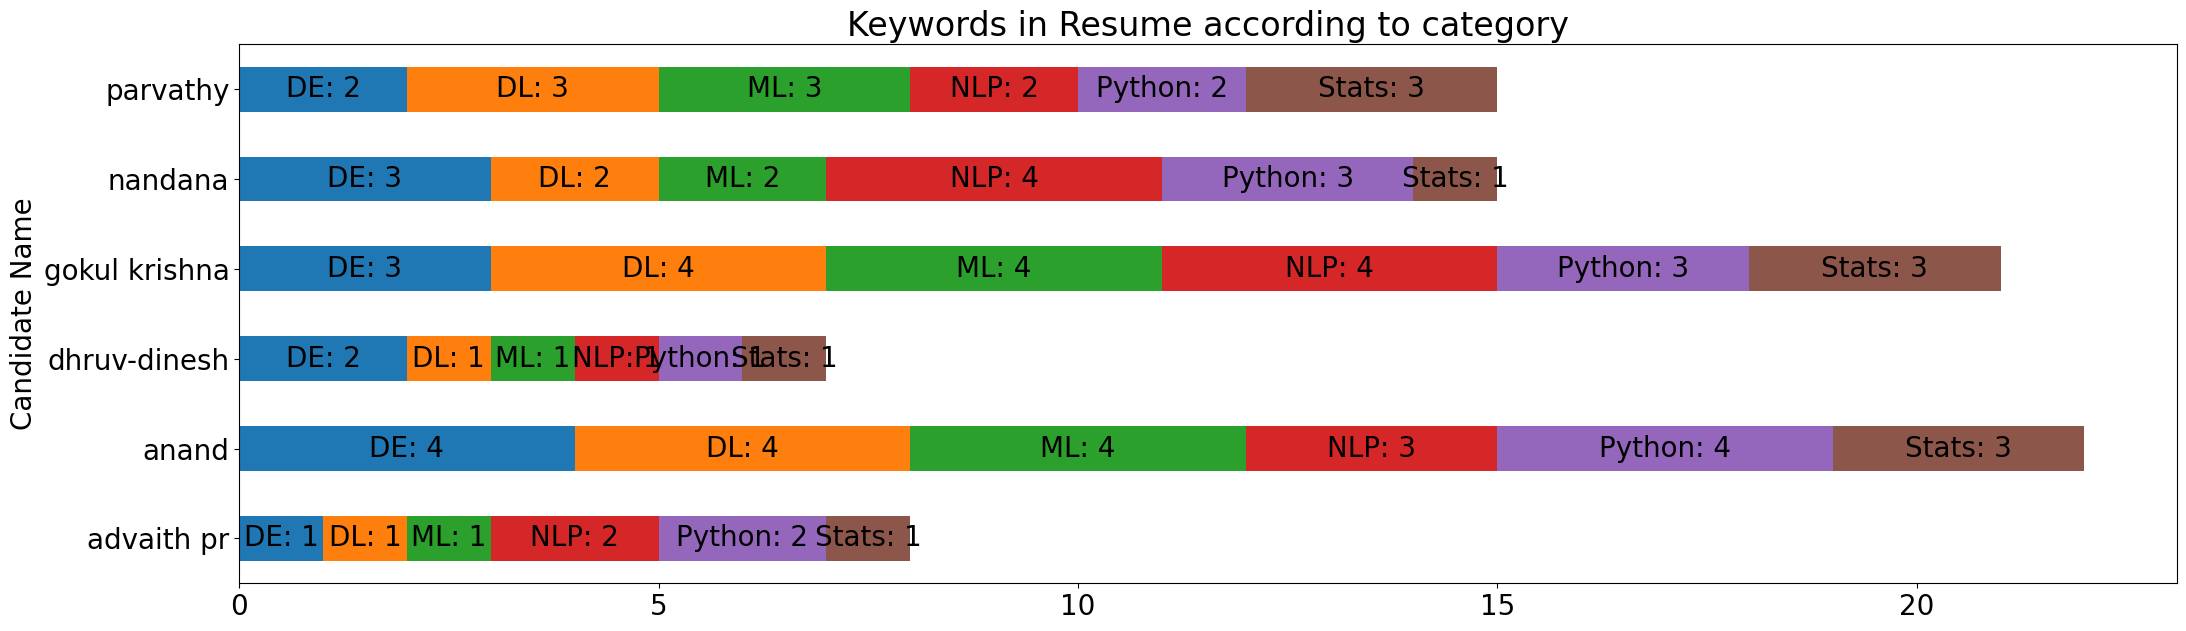

In [121]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 20})
ax = candidate_data.plot.barh(title="Keywords in Resume according to category", legend=False, figsize=(25,7), stacked=True)
skills = []
for j in candidate_data.columns:
    for i in candidate_data.index:
        skill = str(j)+": " + str(candidate_data.loc[i][j])
        skills.append(skill)
patches = ax.patches
for skill, rect in zip(skills, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., skill, ha='center', va='center')
plt.show()

# References

1. https://machinelearningmastery.com/develop-word-embeddings-python-gensim/
2. https://www.shanelynn.ie/word-embeddings-in-python-with-spacy-and-gensim/
3. https://app.sketchengine.eu/
